In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [16]:
# Đọc dữ liệu từ file CSV
data = pd.read_csv('Data/ADA-USD.csv')

In [17]:
# Hiển thị thông tin cơ bản về dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2285 entries, 0 to 2284
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2285 non-null   object 
 1   Open       2285 non-null   float64
 2   High       2285 non-null   float64
 3   Low        2285 non-null   float64
 4   Close      2285 non-null   float64
 5   Adj Close  2285 non-null   float64
 6   Volume     2285 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 125.1+ KB
None


In [18]:
# Hiển thị 5 hàng đầu tiên
print(data.head())

         Date      Open      High       Low     Close  Adj Close     Volume
0  2018-03-01  0.311973  0.311973  0.288392  0.304397   0.304397  184691008
1  2018-03-02  0.304424  0.307058  0.288875  0.293504   0.293504  107240000
2  2018-03-03  0.292952  0.309129  0.292507  0.297106   0.297106  115320000
3  2018-03-04  0.296285  0.303588  0.286193  0.300787   0.300787   94436000
4  2018-03-05  0.299897  0.317723  0.291055  0.297622   0.297622  202675008


In [19]:
# Kiểm tra giá trị thiếu
print(data.isnull().sum())


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [20]:
# Chuyển đổi cột Date sang định dạng datetime
data['Date'] = pd.to_datetime(data['Date'])

In [21]:
print(data)


           Date      Open      High       Low     Close  Adj Close     Volume
0    2018-03-01  0.311973  0.311973  0.288392  0.304397   0.304397  184691008
1    2018-03-02  0.304424  0.307058  0.288875  0.293504   0.293504  107240000
2    2018-03-03  0.292952  0.309129  0.292507  0.297106   0.297106  115320000
3    2018-03-04  0.296285  0.303588  0.286193  0.300787   0.300787   94436000
4    2018-03-05  0.299897  0.317723  0.291055  0.297622   0.297622  202675008
...         ...       ...       ...       ...       ...        ...        ...
2280 2024-05-28  0.467963  0.468437  0.453115  0.456990   0.456990  418594476
2281 2024-05-29  0.456990  0.463107  0.450914  0.450995   0.450995  350482630
2282 2024-05-30  0.450995  0.454546  0.443807  0.446581   0.446581  356151973
2283 2024-05-31  0.446581  0.454957  0.444461  0.447461   0.447461  290913148
2284 2024-06-01  0.447461  0.452584  0.445254  0.449975   0.449975  167918462

[2285 rows x 7 columns]


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2285 entries, 0 to 2284
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2285 non-null   datetime64[ns]
 1   Open       2285 non-null   float64       
 2   High       2285 non-null   float64       
 3   Low        2285 non-null   float64       
 4   Close      2285 non-null   float64       
 5   Adj Close  2285 non-null   float64       
 6   Volume     2285 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 125.1 KB


In [23]:
data.to_csv('Data/pre_ADA-USD.csv', index=False)

In [24]:
# Mô tả bộ dữ liệu
data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2285,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2.285000e+03
mean,2021-04-16 00:00:00,0.475993,0.494150,0.456674,0.476070,0.476070,1.015500e+09
min,2018-03-01 00:00:00,0.023954,0.025993,0.019130,0.023961,0.023961,8.387951e+06
25%,2019-09-23 00:00:00,0.081570,0.083860,0.078425,0.081493,0.081493,1.019063e+08
50%,2021-04-16 00:00:00,0.289501,0.295378,0.280765,0.289531,0.289531,3.147619e+08
75%,2022-11-08 00:00:00,0.544989,0.569267,0.525981,0.544996,0.544996,9.351389e+08
max,2024-06-01 00:00:00,2.966390,3.099186,2.907606,2.968239,2.968239,1.914198e+10
std,NaN,0.566717,0.590825,0.541112,0.566815,0.566815,1.879646e+09


In [25]:
# Mô tả thuộc tính train "Close"
data['Close'].describe()

count    2285.000000
mean        0.476070
std         0.566815
min         0.023961
25%         0.081493
50%         0.289531
75%         0.544996
max         2.968239
Name: Close, dtype: float64

In [27]:

import statistics as st
from scipy.stats import skew
from scipy.stats import kurtosis

#Mode
mode = st.mode(data['Close'])
print("Mode: ", mode)

#Variance
var = st.variance(data['Close'])
print("Variance: ", var)

#Median (trung vị)
median = st.median(data['Close'])
print("Median", median)

#Coefficient of Deviation
cv = st.stdev(data['Close'])/st.mean(data['Close'])
print("Coefficient of Deviation: ",cv)

#Skewness
skew = skew(data['Close'])
print("Skewness", skew)

#Kurtosis
kurtosis = kurtosis(data['Close'])
print("Kurtosis: ", kurtosis)

#Range
range = max(data['Close']) - min(data['Close'])
print("Range: ", range)

Mode:  0.044777
Variance:  0.3212794029566767
Median 0.289531
Coefficient of Deviation:  1.190612858246616
Skewness 1.8846486246298908
Kurtosis:  3.2950984673978088
Range:  2.944278


LẬP BIỂU ĐỒ

In [28]:
# Lấy dữ liệu
df1 = pd.DataFrame(data, columns=['Date', 'Close'])
# Chuyển cột Date làm index để lập biểu đồ so sánh về sau
df1.index = df1.Date
df1.drop('Date', axis=1, inplace=True)

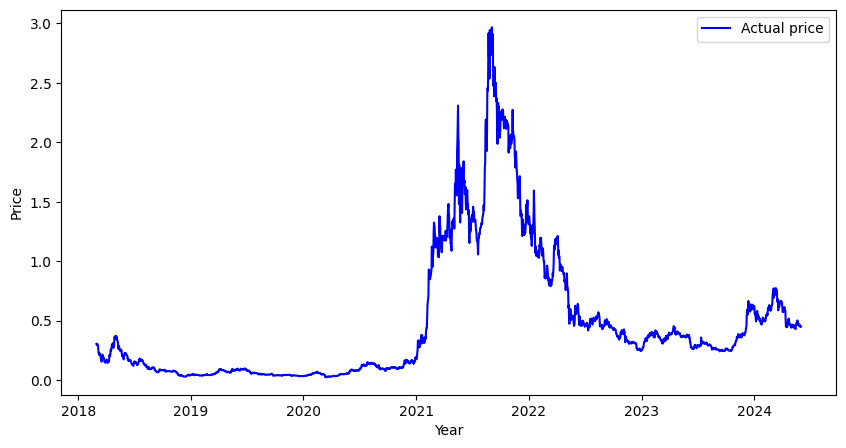

In [29]:
#Lập biểu đồ giá đóng
plt.figure(figsize=(10,5))
plt.plot(df1['Close'], label='Actual price', color='blue')
# plt.title('ADA stock market')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()
